### Stock news sentiment analysis - Exploratory Data Analysis

**Problem Statement:**
In financial markets, the continuous influx of news and information significantly influences investor sentiment and stock price movements. However, the unstructured nature and high volume of financial news make it challenging for analysts to efficiently extract and interpret sentiment signals that could improve market predictions.

**Goal:**

This project aims to build a sentiment analysis system that automatically processes financial news to evaluate market sentiment, aggregates insights on a weekly basis, and integrates them into predictive models to improve stock price forecasting and investment strategy decisions.

**Scope for part 1:** We will do the exploratory data analysis and end with using baseline model for predictions.

**Data Problem:**

The primary data problem in this project is to extract meaningful sentiment signals from financial news headlines and determine how these sentiments correlate with subsequent stock price movements. This involves:

Preprocessing and cleaning textual data to remove noise, irrelevant symbols, and inconsistencies.

Accurately identifying and classifying sentiment polarity (positive, negative, or neutral) within financial news headlines.

Aggregating daily sentiment data into weekly sentiment scores to align with broader market trends.

Linking sentiment trends with historical stock indicators to evaluate potential predictive relationships.

The challenge lies in building a data representation that effectively captures the emotional tone of market news and aligns it with quantitative stock metrics. This processed and labeled dataset will form the foundation for developing predictive models that assess how sentiment dynamics influence stock market performance.

**Expected Results:**

The project is expected to produce the following outcomes:

* A functional sentiment analysis model capable of automatically classifying financial news articles as positive, negative, or neutral using natural language processing (NLP) techniques.

* Weekly sentiment summaries that capture aggregate market mood and highlight major shifts in investor perception over time.

* Improved stock price prediction accuracy through the integration of sentiment-based features with historical market data.

* Interactive visualizations and insights dashboards that allow analysts to explore sentiment trends and their correlation with stock movements.

* Actionable intelligence for investment decision-making, enabling financial analysts to incorporate real-time sentiment dynamics into portfolio management and strategy optimization.  


**Data**

Data Description

The dataset used in this project integrates financial news headlines with corresponding daily stock market data to analyze the influence of market sentiment on stock price movements.
It primarily focuses on Apple Inc. (AAPL) and includes several news items per trading day, alongside daily price indicators such as opening, closing, and trading volume.

The dataset was constructed by combining publicly available information from Kaggle (financial news and sentiment data) and Yahoo Finance (historical stock market data).
It serves as a consolidated resource for studying how textual sentiment derived from news coverage aligns with real-world stock performance.
The dataset is intended solely for academic and research purposes.

| **Column Name** | **Description**                                                                                   |
| --------------- | ------------------------------------------------------------------------------------------------- |
| **Date**        | The trading date corresponding to each news headline and market data entry.                       |
| **News**        | Textual financial news or article excerpts describing relevant company or market events.          |
| **Open**        | The stock’s opening price on the corresponding trading day.                                       |
| **High**        | The highest stock price recorded during that day’s trading session.                               |
| **Low**         | The lowest stock price recorded during the session.                                               |
| **Close**       | The final closing price of the stock at the end of the trading day.                               |
| **Volume**      | The total number of shares traded on the given date.                                              |
| **Label**       | Sentiment polarity assigned to each news article: `1` = positive, `0` = neutral, `-1` = negative. |



#### Import and Setup

In [130]:
import pandas as pd                     # Data manipulation and analysis
import numpy as np                      # Numerical operations
import time                             # Time-related functions
import json                             # Parsing JSON data
import string                           # String manipulation
import warnings                         # Suppress unnecessary warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt          # Plotting and data visualization
import seaborn as sns                    # Statistical visualizations

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score,f1_score, classification_report


#### Data Overview


In [131]:
#load the dataset
stock_news = pd.read_csv("data/stock_news.csv")

In [132]:
print('Shape of the dataset:', stock_news.shape)
stock_news.head()

Shape of the dataset: (349, 8)


,Date,News,Open,High,Low,Close,Volume,Label
0,1/2/2019,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,1/2/2019,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,1/2/2019,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,1/2/2019,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,1/2/2019,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [133]:
#check data types
stock_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


In [134]:
#Convert the date to the datetime type
stock_news['Date'] = pd.to_datetime(stock_news['Date'])

In [135]:
#check statistical summary
stock_news.describe()

,Date,Open,High,Low,Close,Volume,Label
count,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
mean,2019-02-16 16:05:30.085959936,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
min,2019-01-02 00:00:00,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,2019-01-14 00:00:00,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,2019-02-05 00:00:00,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,2019-03-22 00:00:00,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000
max,2019-04-30 00:00:00,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000
std,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119


#### Exploratory Data Analysis

In [136]:
#check for nulls
stock_news.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


No null values found

In [137]:
#check for duplicates
stock_news.duplicated().sum()

np.int64(0)

No duplicate values found

In [138]:
#write a utility function
def labeled_barplot(data, column, show_perc=False, top_n=None):
    """
    Create a bar plot with counts or percentages annotated on top of each bar.

    Parameters
    ----------
    data : pandas.DataFrame
        The dataframe containing the feature to plot.
    column : str
        The column name representing the categorical feature.
    show_perc : bool, optional (default=False)
        If True, display percentages instead of counts.
    top_n : int, optional (default=None)
        Display only the top n categories by frequency.
    """

    # Determine how many categories to display
    total_rows = len(data[column])
    unique_levels = data[column].nunique()
    num_bars = top_n if top_n else unique_levels

    plt.figure(figsize=(num_bars + 1, 5))
    plt.xticks(rotation=90, fontsize=13)

    # Create count plot ordered by frequency
    order = data[column].value_counts().index[:top_n]
    ax = sns.countplot(data=data, x=column, order=order, palette="Set2")

    # Add labels above bars
    for patch in ax.patches:
        height = patch.get_height()
        if show_perc:
            label = f"{(height / total_rows) * 100:.1f}%"
        else:
            label = f"{height}"

        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height + (0.01 * height),
            label,
            ha="center",
            va="bottom",
            fontsize=11
        )

    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel("Percentage" if show_perc else "Count", fontsize=14)
    plt.title(f"Distribution of {column}", fontsize=16)
    plt.tight_layout()
    plt.show()


**Univariate Analysis**
* Distribution of individual variables
* Compute and check the distribution of the length of news content  

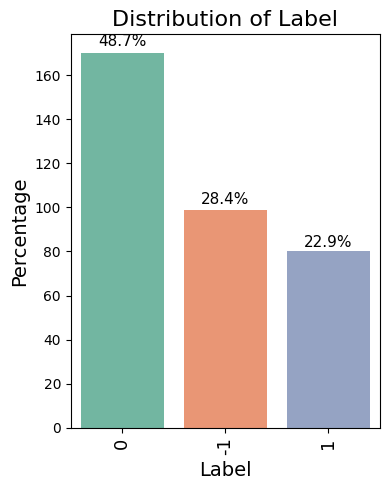

In [139]:
#distribution of Label data
labeled_barplot(stock_news, 'Label', show_perc=True)

**Observation:** As the above plot indicates , majority of the data had neutral sentiment (48.7% , closely to 50%). Next is Negative sentiment with around 28.4% and positive is about 22.9%. The data is imbalanced towards neutral polarity.

<Axes: xlabel='Volume', ylabel='Count'>

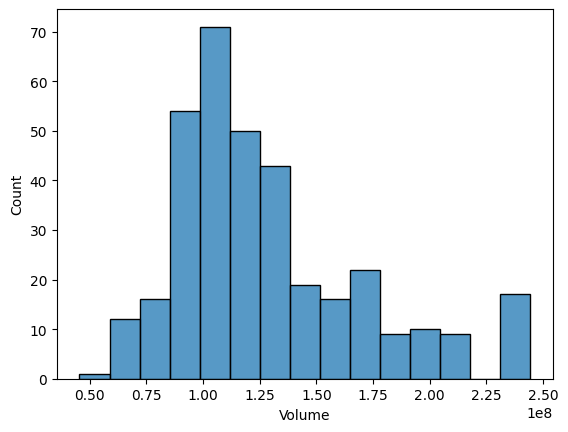

In [140]:
#distribution of trade volume
sns.histplot(stock_news, x='Volume')

**Observation:** Trading volumes were generally within the 80–175 million range, with a few outlier days exceeding 200 million shares.

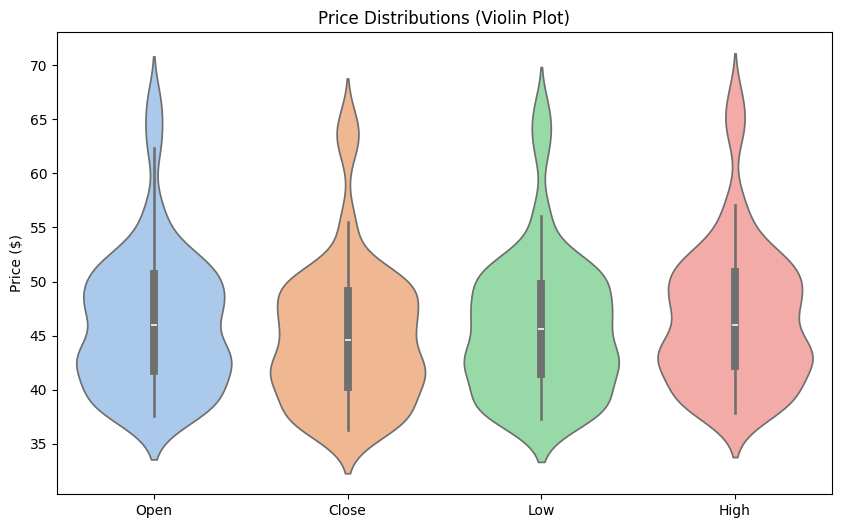

In [141]:
#check distribution of open, close, low, high prices
plt.figure(figsize=(10,6))
sns.violinplot(data=stock_news[['Open', 'Close', 'Low', 'High']], palette="pastel")
plt.title("Price Distributions (Violin Plot)")
plt.ylabel("Price ($)")
plt.show()

**Observation:** The distributions are mostly alike, with the high price showing a bit more variation

In [142]:
#Check on the distribution of the length of the news text
#Calculating the total number of words present in the news content.
stock_news['news_word_count'] = stock_news['News'].apply(lambda x: len(x.split(' ')))
stock_news['news_word_count'].describe()

,news_word_count
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


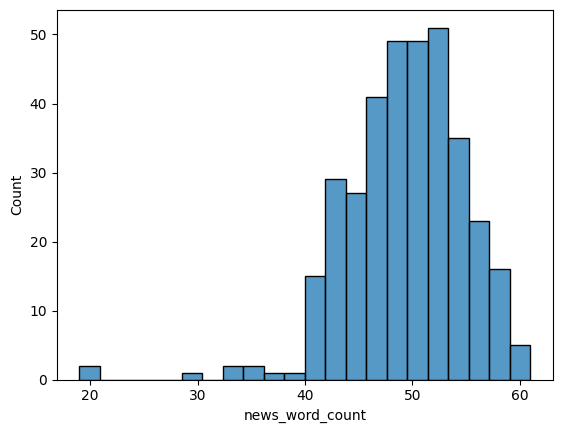

In [143]:
#distribution of word count of news column
sns.histplot(data=stock_news,x='news_word_count');

###Bivariate Analysis

* Correlation between 2 variables, eg:
  * Sentiment Polarity vs Price
  * Date vs Price
  * etc..

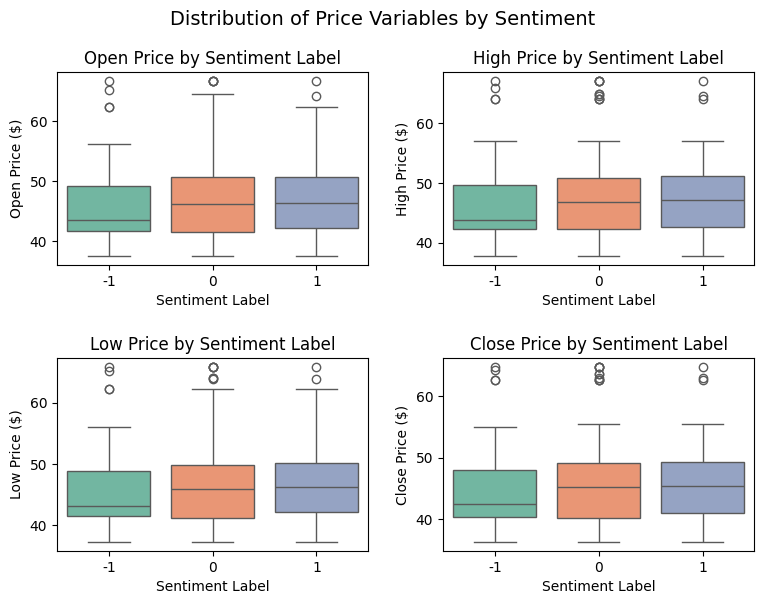

In [144]:
# Calculate correction between Sentiment polarity vs all Price features


plt.figure(figsize=(8, 6))

price_features = ['Open', 'High', 'Low', 'Close']

# Create a 2x2 grid of boxplots
for idx, feature in enumerate(price_features, start=1):
    plt.subplot(2, 2, idx)
    sns.boxplot(x="Label", y=feature, data=stock_news, palette="Set2")
    plt.title(f"{feature} Price by Sentiment Label", fontsize=12)
    plt.xlabel("Sentiment Label")
    plt.ylabel(f"{feature} Price ($)")
    plt.tight_layout(pad=2)

plt.suptitle("Distribution of Price Variables by Sentiment", fontsize=14, y=1.02)
plt.show()

**Observation:**
* The median values of all price variables are lower for negative sentiment news
* There is the higher upper whisker for the opening price under neutral sentiment

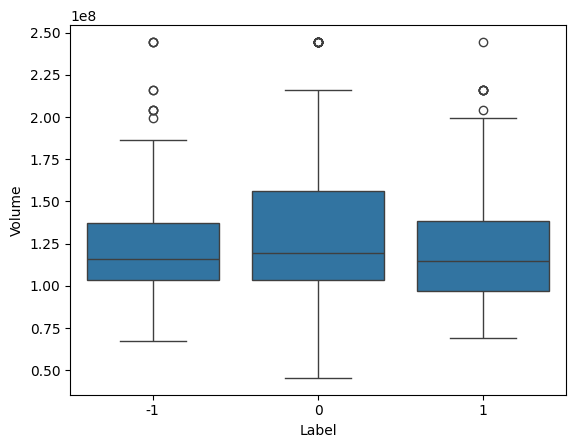

In [145]:
#Label vs Volume
sns.boxplot(
    data=stock_news, x="Label", y="Volume"
);

**Observation:** The median trading volume remains relatively consistent across all sentiment categories.

In [146]:
#since there are many news items for each day but the price/volumes are same for each day, we should aggregate the data by day
stock_news_daily = stock_news.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group by the 'Date' column

stock_news_daily.set_index('Date', inplace=True)
stock_news_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


Text(0.5, 1.0, 'Stock Price Over Time')

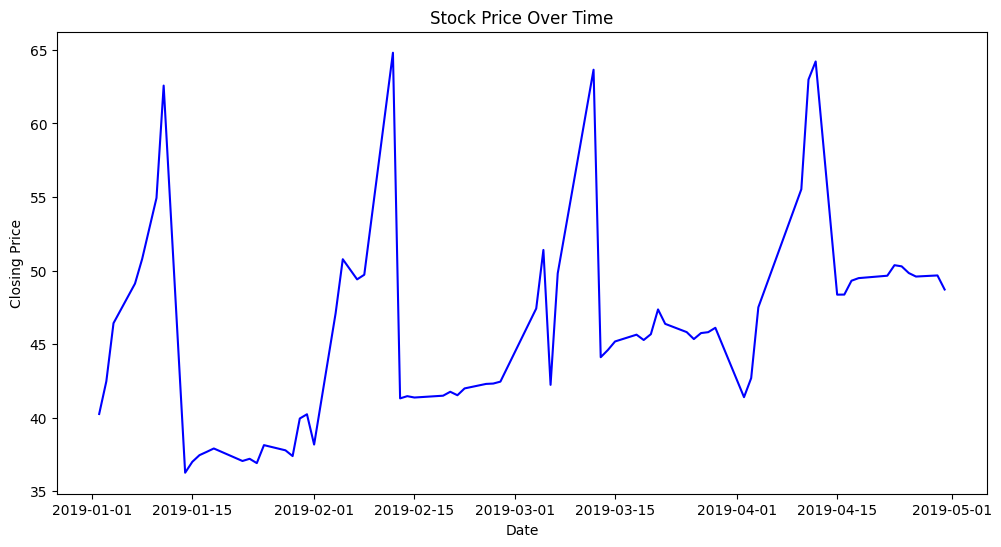

In [147]:
#Date vs Price
# Date vs Price analysis

# plot the stock price trending over time
plt.figure(figsize=(12, 6))
plt.plot(stock_news_daily.index, stock_news_daily['Close'], label='Stock Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Over Time')

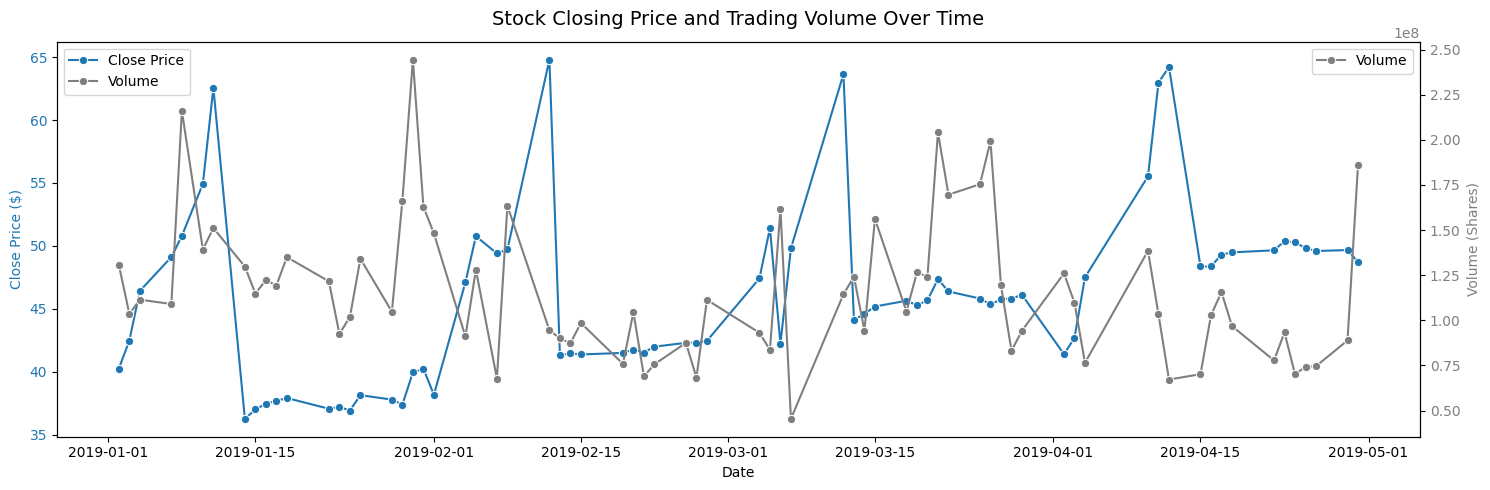

In [148]:
# Close Price vs. Trading Volume

# Create the main figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot Close Price on the primary Y-axis
sns.lineplot(
    data=stock_news_daily.reset_index(),
    x="Date",
    y="Close",
    ax=ax1,
    color="tab:blue",
    marker="o",
    label="Close Price"
)
ax1.set_ylabel("Close Price ($)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create secondary Y-axis for Volume
ax2 = ax1.twinx()

sns.lineplot(
    data=stock_news_daily.reset_index(),
    x="Date",
    y="Volume",
    ax=ax2,
    color="tab:gray",
    marker="o",
    label="Volume"
)
ax2.set_ylabel("Volume (Shares)", color="tab:gray")
ax2.tick_params(axis="y", labelcolor="tab:gray")

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Formatting
plt.title("Stock Closing Price and Trading Volume Over Time", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

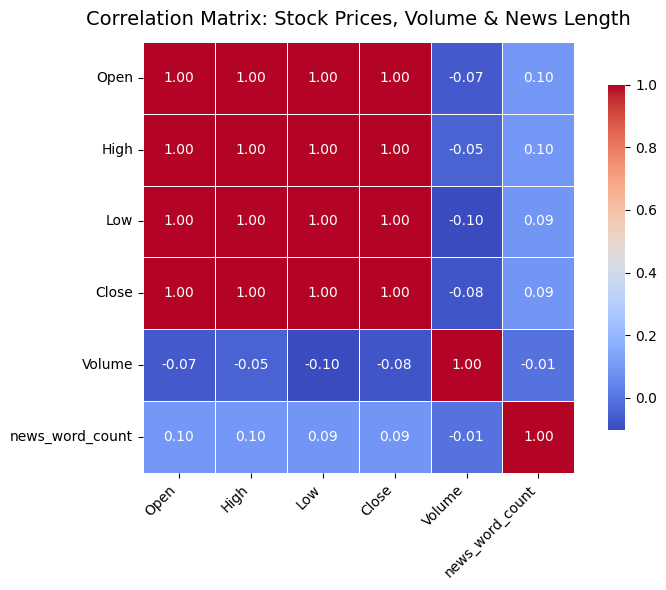

In [149]:
# Correlation Matrix Visualization

cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'news_word_count']

# Compute correlation matrix
corr_matrix = stock_news[cols].corr()

# Set up the figure
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,               # display correlation values
    fmt=".2f",                # format to 2 decimal places
    cmap="coolwarm",          # color palette
    linewidths=0.5,           # thin lines between cells
    square=True,              # make cells square
    cbar_kws={"shrink": 0.8}  # color bar size
)

plt.title("Correlation Matrix: Stock Prices, Volume & News Length", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Observation:**
* The price variables exhibit a near-perfect positive correlation, indicating that they move closely together.
* There is a slight negative correlation between trading volume and price levels, though the relationship is weak.

#### Data Preparation

In [150]:
stock_news.describe()

,Date,Open,High,Low,Close,Volume,Label,news_word_count
count,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000,349.000000
mean,2019-02-16 16:05:30.085959936,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441,49.312321
min,2019-01-02 00:00:00,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000,19.000000
25%,2019-01-14 00:00:00,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000,46.000000
50%,2019-02-05 00:00:00,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000,50.000000
75%,2019-03-22 00:00:00,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000,53.000000
max,2019-04-30 00:00:00,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000,61.000000
std,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119,5.727770


**Observation:** Analysis shows that nearly three-quarters of the dataset corresponds to the first three weeks of March 2019.
Accordingly, data up to the end of March 2019 will be allocated for model training, while the April 2019 portion will be partitioned into validation and test subsets.

###Data split - Train, Validation, and Test splits

In [151]:
X_train = stock_news[stock_news['Date'] < '2019-04-01'].reset_index()
X_val = stock_news[(stock_news['Date'] >= '2019-04-01') & (stock_news['Date'] < '2019-04-16')].reset_index()
X_test = stock_news[stock_news['Date'] >= '2019-04-16'].reset_index()

y_train = X_train['Label'].copy()
y_val = X_val['Label'].copy()
y_test = X_test['Label'].copy()

print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)
print('----')

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 10)
Validation data shape (21, 10)
Test data shape  (42, 10)
----
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


In [152]:
#check the distribution of target variable
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Label
 0    0.482517
-1    0.286713
 1    0.230769
Name: proportion, dtype: float64
Label
 0    0.571429
 1    0.238095
-1    0.190476
Name: proportion, dtype: float64
Label
 0    0.476190
-1    0.309524
 1    0.214286
Name: proportion, dtype: float64


### Baseline Model: Naive Bayes

To establish a starting benchmark for sentiment prediction, we begin with a Multinomial Naive Bayes classifier — a simple yet effective model commonly used in text classification tasks.
Naive Bayes assumes that features (words, in this case) are conditionally independent, which makes it computationally efficient and interpretable. Despite its simplicity, it often provides competitive performance on short text data such as news headlines.

**Approach**

Text Vectorization
Convert raw text into numerical features using TF-IDF (Term Frequency–Inverse Document Frequency), which weighs words based on how important they are to a document relative to the corpus.

**Model Training**
Fit a Multinomial Naive Bayes (MNB) classifier using the TF-IDF features and sentiment labels.

**Evaluation**
Assess model performance using standard metrics: Accuracy, Precision, Recall, and F1-score.

**Naïve Bayes**

A pipeline object is created to standardize the data using TF-IDF and instantiate a Naïve Bayes model. RandomizedSearchCV is used to find the optimal alpha value (options: [1, 0.1, 0.01, 0.001, 0]), which is 0.1.

In [153]:
#naive bayes model with tfidf vectorizer
nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('bayes', MultinomialNB())
])

In [154]:
#nb params
nb_params = {'bayes__alpha' : [1, 0.1, 0.01, 0.001, 0]}

In [155]:
#grid search
nb_grid = RandomizedSearchCV(estimator = nb,
                            param_distributions = nb_params)

start = time.time()
nb_grid.fit(X_train['News'], y_train)
stop = time.time()

#stats
nb_time = stop - start
nb_params = nb_grid.best_params_
nb_acc = nb_grid.score(X_test['News'], y_test)

print('Model performance metrics....')
print(f'Time taken: {nb_time}')
print(f'Best parameters: {nb_params}')

Model performance metrics....
Time taken: 0.5994608402252197
Best parameters: {'bayes__alpha': 0.01}


In [156]:
#best params
nb_params

{'bayes__alpha': 0.01}

Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

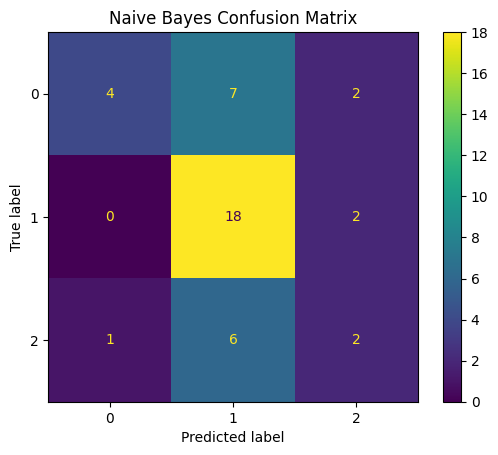

In [157]:
#naive bayes
#compile preds
nb_preds = nb_grid.predict(X_test['News'])

ConfusionMatrixDisplay(confusion_matrix(y_test, nb_preds)).plot()
plt.grid(False)
plt.title("Naive Bayes Confusion Matrix")


### Summary and Next Steps

This notebook marks Part 1 of the Stock News Sentiment Analysis project, focusing on Exploratory Data Analysis (EDA) and the development of a baseline sentiment model.

**Key findings from the exploratory phase include: **

* Stock price variables (Open, High, Low, Close) are highly correlated, while trading volume shows only a weak inverse relationship with prices.

* News items typically contain 40–60 words, confirming that the dataset primarily consists of short news summaries rather than full articles.

* Negative sentiment news is associated with lower stock prices, indicating that investor reactions to adverse news may drive short-term market declines.

**A Multinomial Naive Bayes model** using TF-IDF features was implemented as the baseline, providing a simple yet effective starting point for sentiment classification. This establishes a reference for evaluating the impact of more sophisticated text representations in future work.

**In Part 2, the focus will shift toward:**

* Implementing Word2Vec and SentenceTransformer embeddings to capture richer semantic relationships between words and sentences.

* Comparing embedding-based models against the baseline to assess improvements in contextual understanding and classification accuracy.

* Extending the analysis to aggregate sentiment trends and explore their relationship with short-term price movements.

* This phase successfully builds the analytical foundation for deeper modeling and advanced sentiment representation in the next stage of the project.
